In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
dataframe = pd.read_csv("/content/Social_Network_Ads.csv")

In [ ]:
dataframe

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0
...,...,...,...,...,...
395,15691863,Female,46,41000,1
396,15706071,Male,51,23000,1
397,15654296,Female,50,20000,1
398,15755018,Male,36,33000,0


In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
dataframe["Gender"] = le.fit_transform(dataframe["Gender"])

In [ ]:
correlation = dataframe.corr()

In [ ]:
correlation

,User ID,Gender,Age,EstimatedSalary,Purchased
User ID,1.000000,-0.025249,-0.000721,0.071097,0.007120
Gender,-0.025249,1.000000,-0.073741,-0.060435,-0.042469
Age,-0.000721,-0.073741,1.000000,0.155238,0.622454
EstimatedSalary,0.071097,-0.060435,0.155238,1.000000,0.362083
Purchased,0.007120,-0.042469,0.622454,0.362083,1.000000


<Axes: >

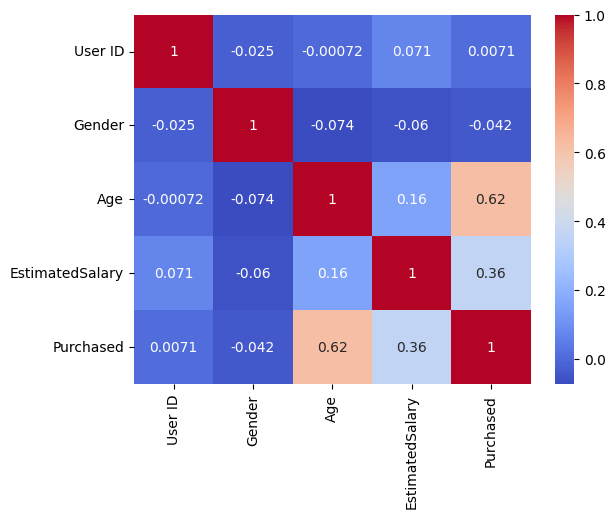

In [ ]:
sns.heatmap(correlation,annot=True,cmap="coolwarm")

In [ ]:
X = dataframe.iloc[:,2:-1]
y = dataframe.iloc[:,-1]

In [ ]:
X

,Age,EstimatedSalary
0,19,19000
1,35,20000
2,26,43000
3,27,57000
4,19,76000
...,...,...
395,46,41000
396,51,23000
397,50,20000
398,36,33000


In [ ]:
y

0      0
1      0
2      0
3      0
4      0
      ..
395    1
396    1
397    1
398    0
399    1
Name: Purchased, Length: 400, dtype: int64

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [ ]:
X_test

,Age,EstimatedSalary
132,30,87000
309,38,50000
341,35,75000
196,30,79000
246,35,50000
...,...,...
14,18,82000
363,42,79000
304,40,60000
361,53,34000


In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [ ]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression()
classifier.fit(X_train,y_train)

LogisticRegression()

In [ ]:
from sklearn.metrics import confusion_matrix,accuracy_score
y_pred = classifier.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[57  1]
 [ 5 17]]


0.925

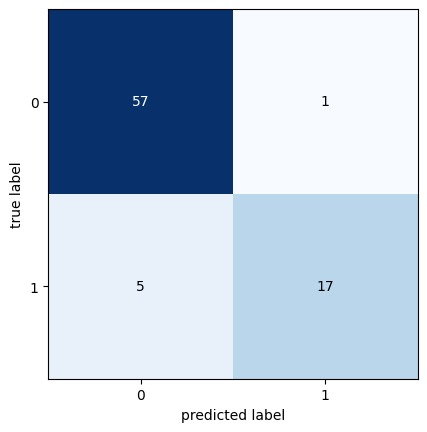

In [ ]:
from mlxtend.plotting import plot_confusion_matrix
fig, ax = plot_confusion_matrix(conf_mat=cm)
plt.show()

Text(0.5, 1.0, 'Plot Age vs Purchased(Training data)')

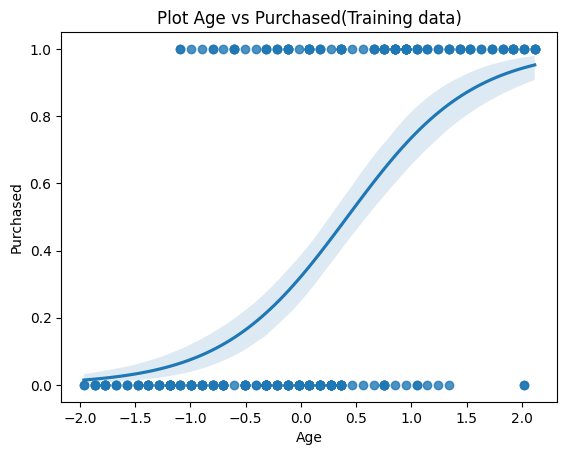

In [ ]:
sns.regplot(x=X_train[:,0],y=y_train,data=dataframe,logistic=True)
plt.xlabel("Age")
plt.title("Plot Age vs Purchased(Training data)")

Text(0.5, 1.0, 'Plot Estimated Salary vs Purchased(Training data)')

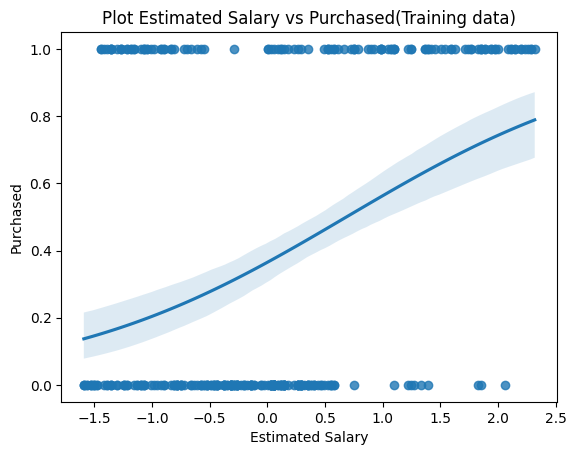

In [ ]:
sns.regplot(x=X_train[:,1],y=y_train,data=dataframe,logistic=True)
plt.xlabel("Estimated Salary")
plt.title("Plot Estimated Salary vs Purchased(Training data)")

/usr/local/lib/python3.10/dist-packages/statsmodels/genmod/families/links.py:198: RuntimeWarning: overflow encountered in exp
  t = np.exp(-z)


Text(0.5, 1.0, 'Plot Age vs Purchased(Test data)')

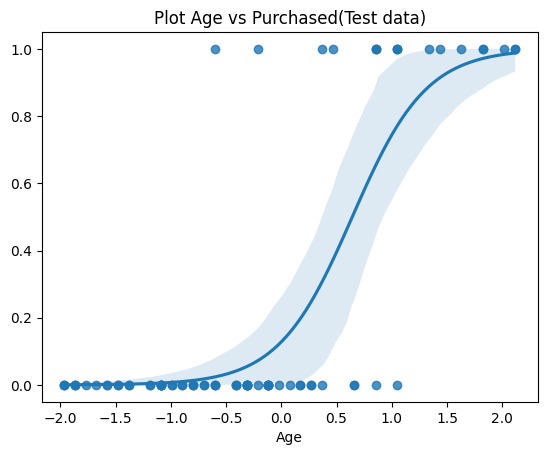

In [ ]:
sns.regplot(x=X_test[:,0],y=y_pred,data=dataframe,logistic=True)
plt.xlabel("Age")
plt.title("Plot Age vs Purchased(Test data)")

Text(0.5, 1.0, 'Plot Estimated Salary vs Purchased(Test data)')

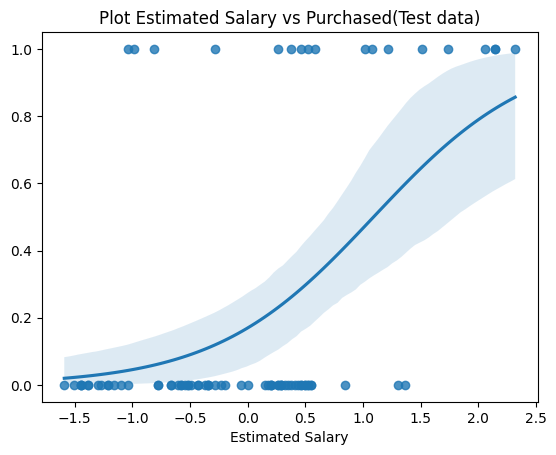

In [ ]:
sns.regplot(x=X_test[:,1],y=y_pred,data=dataframe,logistic=True)
plt.xlabel("Estimated Salary")
plt.title("Plot Estimated Salary vs Purchased(Test data)")